In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

tensor([[[[252.,  85., 251.,  ..., 214.,   4.,  31.],
          [247., 156.,  29.,  ..., 224., 221., 171.],
          [ 87., 241.,  62.,  ..., 198., 132., 181.],
          ...,
          [163.,  62., 106.,  ...,  21., 190.,  52.],
          [194.,  19., 248.,  ...,  47., 206., 164.],
          [ 58.,  93., 222.,  ..., 235.,  32., 157.]]]])

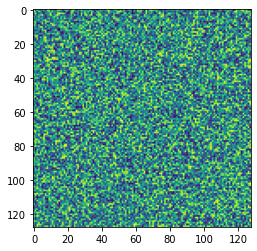

In [9]:
img = np.random.randint(256, size=(1,1,256,256))
plt.imshow(img[0,0])
img = torch.tensor(img, dtype=torch.float32)
img

In [10]:
def init(module, gain):
    nn.init.orthogonal_(module.weight.data, gain=gain)
    nn.init.constant_(module.bias.data, 0)
    return module

def init_(module):
    return init(module, nn.init.calculate_gain('relu'))

conv = nn.Sequential(
    # 128*128 -> 31*31
    init_(nn.Conv2d(1, 16, kernel_size=8, stride=4, padding=2)),
    nn.ReLU(),
    # 31*31 -> 15*15
    init_(nn.Conv2d(16, 32, kernel_size=4, stride=2)),
    nn.ReLU(),
    # 15*15 -> 13*13
    init_(nn.Conv2d(32, 32, kernel_size=3, stride=1)),
    nn.ReLU(),
    nn.Flatten(),
    # 16*13*13 -> 200
    init_(nn.Linear(32*13*13, 200)),
    nn.ReLU()
)

conv2 = nn.Sequential(
    # 256*256 -> 126*126
    init_(nn.Conv2d(1, 16, kernel_size=8, stride=4)),
    nn.ReLU(),
    # 126*126 -> 62*62
    init_(nn.Conv2d(16, 32, kernel_size=4, stride=2)),
    nn.ReLU(),
    # 62*62 -> 30*30
    init_(nn.Conv2d(32, 32, kernel_size=4, stride=2)),
    nn.ReLU(),
    # 30*30 -> 14*14
    init_(nn.Conv2d(32, 32, kernel_size=4, stride=2)),
    nn.ReLU(),
    init_(nn.Conv2d(32, 32, kernel_size=3, stride=1)),
    nn.Flatten(),
    # 16*13*13 -> 200
    init_(nn.Linear(32*13*13, 200)),
    nn.ReLU()
)
# 256 -> 126 -> 62

In [11]:
with torch.no_grad():
    print(conv(img).squeeze())

tensor([175.0990, 331.6867,   0.0000,   0.0000,   0.0000,  16.9161,  93.6882,
        224.2289,   0.0000,   0.0000, 183.8844, 111.8669, 360.1257, 176.6390,
         47.2289,   0.0000,  42.1032,   0.0000, 378.8281,  13.2187, 274.0255,
          0.0000,   0.0000,   5.0583,   0.0000, 155.3743, 167.8419,   0.0000,
          0.0000,   0.0000, 298.7631,   0.0000,   0.0000,   0.0000, 169.1023,
          0.0000, 117.6048,  58.9529,  43.1860,   0.0000,   0.0000, 131.4991,
        132.7779, 320.4214, 220.0564,   0.0000,   5.5597, 100.2635, 471.1788,
          0.0000,   0.0000,  57.3330,   0.0000,   0.0000,  50.1304, 183.6111,
        308.5294,   0.0000, 380.6546, 352.7778,   0.0000,  84.5713,   0.0000,
         62.3163, 286.3981,   0.0000,   0.0000, 291.6396,   4.3927,  54.2707,
        145.9971,   0.0000,   0.0000, 133.5400,   0.0000,   0.0000,  84.5685,
        266.7504,   0.0000,   0.0000, 138.1324, 339.5236,  48.5569, 298.8494,
        219.2203,   1.9368,   0.0000,   0.0000,  49.6023, 139.57

In [191]:
inp = torch.randn(1,1,6,6)
m = nn.Sequential(
    nn.Conv2d(1, 1, kernel_size=2, stride=1),
    nn.Flatten()
)

In [305]:
inp.shape, inp.unsqueeze(0).shape

(torch.Size([1, 1, 6, 6]), torch.Size([1, 1, 1, 1, 6, 6]))

In [90]:
m(inp), m(inp).reshape(1,5,5)

(tensor([[-0.2797,  0.3857, -0.2242, -0.4814, -0.2109, -0.4082, -0.2232, -0.0527,
           0.0412,  0.6927, -0.1552, -0.0918, -0.0477, -0.1135, -0.2987, -0.1820,
           0.4787,  0.6969,  0.6111, -0.3233,  0.0336,  0.3475,  0.1964,  0.4412,
          -0.1381]], grad_fn=<ViewBackward>),
 tensor([[[-0.2797,  0.3857, -0.2242, -0.4814, -0.2109],
          [-0.4082, -0.2232, -0.0527,  0.0412,  0.6927],
          [-0.1552, -0.0918, -0.0477, -0.1135, -0.2987],
          [-0.1820,  0.4787,  0.6969,  0.6111, -0.3233],
          [ 0.0336,  0.3475,  0.1964,  0.4412, -0.1381]]],
        grad_fn=<ViewBackward>))

In [12]:
enhance = nn.Sequential(
    init_(nn.Linear(3,10)),
    nn.ReLU()
)

In [13]:
num = np.arange(-100,101)
pp = [torch.full([3], i, dtype=torch.float32) for i in num]

arr = np.vstack([enhance(p).detach().numpy() for p in pp])

arr

array([[  0.        ,  35.281944  ,  14.607338  , ..., 162.4472    ,
          0.        ,   0.        ],
       [  0.        ,  34.929123  ,  14.461266  , ..., 160.82274   ,
          0.        ,   0.        ],
       [  0.        ,  34.576305  ,  14.315197  , ..., 159.19827   ,
          0.        ,   0.        ],
       ...,
       [ 14.408955  ,   0.        ,   0.        , ...,   0.        ,
          0.6706581 ,   4.36195   ],
       [ 14.5559845 ,   0.        ,   0.        , ...,   0.        ,
          0.6775017 ,   4.4064636 ],
       [ 14.703014  ,   0.        ,   0.        , ...,   0.        ,
          0.68434334,   4.4509735 ]], dtype=float32)

In [23]:
arr.shape, enhance(torch.tensor([1,1,1], dtype=torch.float32)).detach().numpy()

((201, 10),
 array([0.14703014, 0.        , 0.        , 0.        , 1.2498395 ,
        0.        , 0.        , 0.        , 0.00684345, 0.04450974],
       dtype=float32))

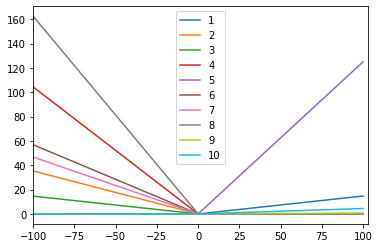

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(num[0], num[-1]+3)
for i in range(len(arr[0])):
    ax.plot(num, arr[:,i], label=i+1)
    
ax.legend()

In [292]:
def a(**kwarg):
    print(kwarg['asdf'])
    
a(**{'asdf':1})

1


In [311]:
np.expand_dims(np.array([1,1,1]), axis=0).shape

(1, 3)

In [316]:
torch.cat([torch.tensor([[1,1,1]]), torch.tensor([[2,2,2]])], axis=1)

tensor([[1, 1, 1, 2, 2, 2]])

In [18]:
torch.cuda.is_available()

True